In [91]:

import numpy as np
import matplotlib.pyplot as plt

In [92]:
A = np.array([[0.1, 0.2],[0.2, -0.3]])
B = np.array([[0.2, 0.1, 0.03, -0.1],[0.1, 0.3, -0.2, 0.05]])
Cr = np.eye(2)

In [93]:
dt = 0.01

In [94]:
Ac = (A-np.eye(2))/dt
Bc = B/dt

In [95]:
num_inputs = 2
num_states = 2

In [96]:
gamma2 = 1
num_snaps_ctrl = 1000
# specify the matricies

x_ctrl2 = np.empty((num_states, num_snaps_ctrl))
u_ctrl2 = np.empty((num_inputs, num_snaps_ctrl - 1))
error = np.empty((num_states, num_snaps_ctrl))
x_ref = np.array([0,0]).T
## initialize the matricies
x_ctrl2[:, 0] = np.array([2,-3])
x_ref_dot = np.array([0,0]).T
t_ctrl = np.arange(start=0, stop=10, step=dt)

for i in range(num_snaps_ctrl - 1):
    t = t_ctrl[i]
    error[:,i] = x_ctrl2[:,i] - x_ref

    u_ctrl2[:,i] = np.linalg.pinv(Cr @ Bc @ np.kron(x_ctrl2[:, i], np.eye(num_inputs)).T) @ (-gamma2 * error[:,i] + x_ref_dot - Cr @ Ac @ x_ctrl2[:,i])

    x_ctrl2[:, i + 1] = np.matmul(x_ctrl2[:, i], A.T) + np.matmul(np.kron(u_ctrl2[:, i], x_ctrl2[:, i]), B.T)

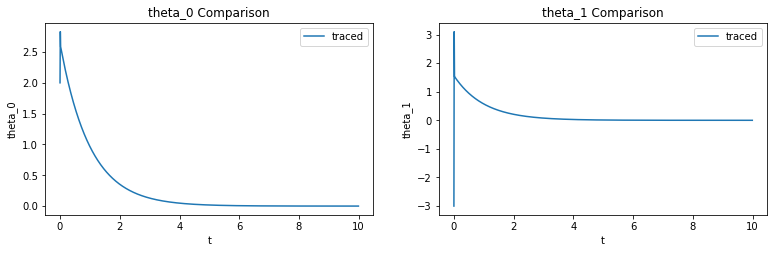

In [97]:
plt.figure(figsize=(20, 12))
for i in range(int(num_states)):
    plt.subplot(3, 3, i + 1)
    # plt.plot(t_ctrl[:], x_ref[i, :], label='reference')
    plt.plot(t_ctrl[:], x_ctrl2[i, :], label='traced')
    plt.xlabel('t')
    plt.ylabel('theta_' + str(i))
    plt.title('theta_' + str(i) + ' Comparison')
    plt.legend()